In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [45]:
df = pd.read_csv('covid_19_data.csv')

In [46]:
df.head(100)

SNo ObservationDate Province/State  Country/Region      Last Update  \
0     1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1     2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2     3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3     4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4     5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   
..  ...             ...            ...             ...              ...   
95   96      01/24/2020       Shanghai  Mainland China    1/24/20 17:00   
96   97      01/24/2020        Jiangxi  Mainland China    1/24/20 17:00   
97   98      01/24/2020        Sichuan  Mainland China    1/24/20 17:00   
98   99      01/24/2020       Shandong  Mainland China    1/24/20 17:00   
99  100      01/24/2020          Anhui  Mainland China    1/24/20 17:00   

    Confirmed  Deaths  Recovered  
0         1.0     0.0        0.0  
1        14.0     0.0        0.0  
2         6.0     0.0        0.0  
3         1.0     0.0        0.0  
4         0.0     0.0        0.0  
..        ...     ...        ...  
95       20.0     0.0        1.0  
96       18.0     0.0        0.0  
97       15.0     0.0        0.0  
98       15.0     0.0        0.0  
99       15.0     0.0        0.0  

[100 rows x 8 columns]

In [47]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)

In [48]:
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [49]:
df

Date              State         Country  Confirmed  Deaths  \
0       01/22/2020              Anhui  Mainland China        1.0     0.0   
1       01/22/2020            Beijing  Mainland China       14.0     0.0   
2       01/22/2020          Chongqing  Mainland China        6.0     0.0   
3       01/22/2020             Fujian  Mainland China        1.0     0.0   
4       01/22/2020              Gansu  Mainland China        0.0     0.0   
...            ...                ...             ...        ...     ...   
306424  05/29/2021  Zaporizhia Oblast         Ukraine   102641.0  2335.0   
306425  05/29/2021            Zeeland     Netherlands    29147.0   245.0   
306426  05/29/2021           Zhejiang  Mainland China     1364.0     1.0   
306427  05/29/2021    Zhytomyr Oblast         Ukraine    87550.0  1738.0   
306428  05/29/2021       Zuid-Holland     Netherlands   391559.0  4252.0   

        Recovered  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
306424    95289.0  
306425        0.0  
306426     1324.0  
306427    83790.0  
306428        0.0  

[306429 rows x 6 columns]

In [50]:
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
df

Date              State         Country  Confirmed  Deaths  \
0      2020-01-22              Anhui  Mainland China        1.0     0.0   
1      2020-01-22            Beijing  Mainland China       14.0     0.0   
2      2020-01-22          Chongqing  Mainland China        6.0     0.0   
3      2020-01-22             Fujian  Mainland China        1.0     0.0   
4      2020-01-22              Gansu  Mainland China        0.0     0.0   
...           ...                ...             ...        ...     ...   
306424 2021-05-29  Zaporizhia Oblast         Ukraine   102641.0  2335.0   
306425 2021-05-29            Zeeland     Netherlands    29147.0   245.0   
306426 2021-05-29           Zhejiang  Mainland China     1364.0     1.0   
306427 2021-05-29    Zhytomyr Oblast         Ukraine    87550.0  1738.0   
306428 2021-05-29       Zuid-Holland     Netherlands   391559.0  4252.0   

        Recovered  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
306424    95289.0  
306425        0.0  
306426     1324.0  
306427    83790.0  
306428        0.0  

[306429 rows x 6 columns]

In [52]:
df.describe()

Confirmed         Deaths     Recovered
count  3.064290e+05  306429.000000  3.064290e+05
mean   8.567091e+04    2036.403268  5.042029e+04
std    2.775516e+05    6410.938048  2.015124e+05
min   -3.028440e+05    -178.000000 -8.544050e+05
25%    1.042000e+03      13.000000  1.100000e+01
50%    1.037500e+04     192.000000  1.751000e+03
75%    5.075200e+04    1322.000000  2.027000e+04
max    5.863138e+06  112385.000000  6.399531e+06

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   State      228329 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  float64       
 4   Deaths     306429 non-null  float64       
 5   Recovered  306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


In [54]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [58]:
df2.head(30)

Date           State         Country Confirmed Deaths Recovered
0  2020-01-22           Anhui  Mainland China       1.0    0.0       0.0
1  2020-01-22         Beijing  Mainland China      14.0    0.0       0.0
2  2020-01-22       Chongqing  Mainland China       6.0    0.0       0.0
3  2020-01-22          Fujian  Mainland China       1.0    0.0       0.0
4  2020-01-22           Gansu  Mainland China       0.0    0.0       0.0
5  2020-01-22       Guangdong  Mainland China      26.0    0.0       0.0
6  2020-01-22         Guangxi  Mainland China       2.0    0.0       0.0
7  2020-01-22         Guizhou  Mainland China       1.0    0.0       0.0
8  2020-01-22          Hainan  Mainland China       4.0    0.0       0.0
9  2020-01-22           Hebei  Mainland China       1.0    0.0       0.0
10 2020-01-22    Heilongjiang  Mainland China       0.0    0.0       0.0
11 2020-01-22           Henan  Mainland China       5.0    0.0       0.0
12 2020-01-22       Hong Kong       Hong Kong       0.0    0.0       0.0
13 2020-01-22           Hubei  Mainland China     444.0   17.0      28.0
14 2020-01-22           Hunan  Mainland China       4.0    0.0       0.0
15 2020-01-22  Inner Mongolia  Mainland China       0.0    0.0       0.0
16 2020-01-22         Jiangsu  Mainland China       1.0    0.0       0.0
17 2020-01-22         Jiangxi  Mainland China       2.0    0.0       0.0
18 2020-01-22           Jilin  Mainland China       0.0    0.0       0.0
19 2020-01-22        Liaoning  Mainland China       2.0    0.0       0.0
20 2020-01-22           Macau           Macau       1.0    0.0       0.0
21 2020-01-22         Ningxia  Mainland China       1.0    0.0       0.0
22 2020-01-22         Qinghai  Mainland China       0.0    0.0       0.0
23 2020-01-22         Shaanxi  Mainland China       0.0    0.0       0.0
24 2020-01-22        Shandong  Mainland China       2.0    0.0       0.0
25 2020-01-22        Shanghai  Mainland China       9.0    0.0       0.0
26 2020-01-22          Shanxi  Mainland China       1.0    0.0       0.0
27 2020-01-22         Sichuan  Mainland China       5.0    0.0       0.0
28 2020-01-22          Taiwan          Taiwan       1.0    0.0       0.0
29 2020-01-22         Tianjin  Mainland China       4.0    0.0       0.0

In [56]:
countries = df2['Country'].unique()
len(countries)

229

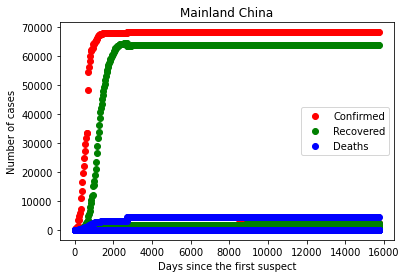

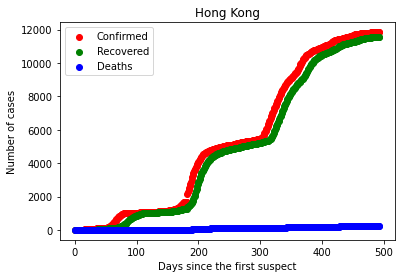

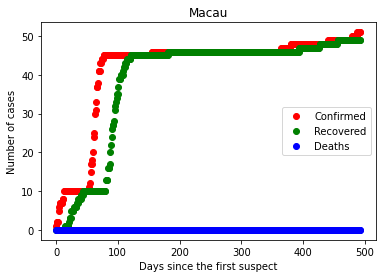

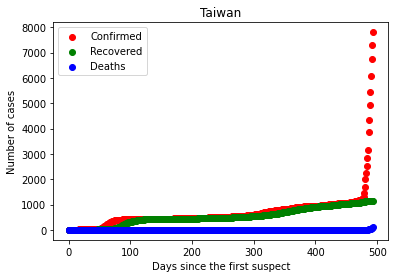

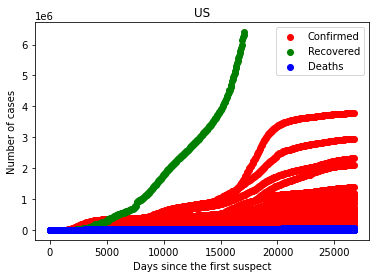

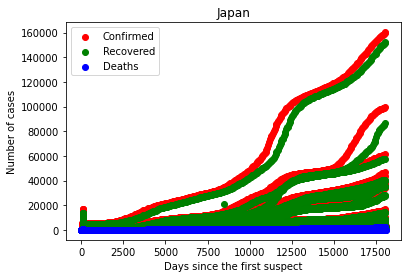

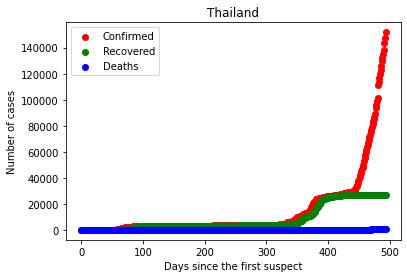

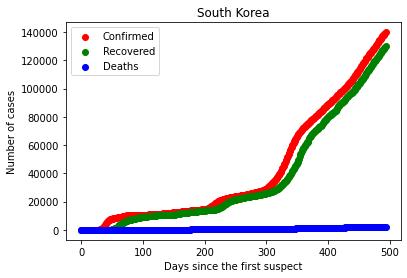

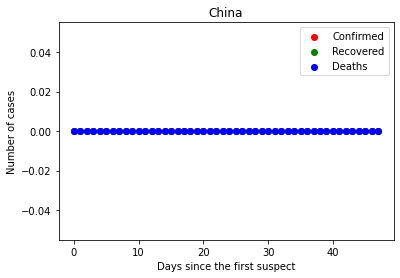

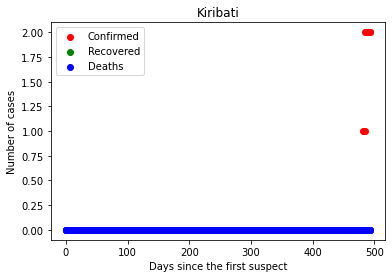

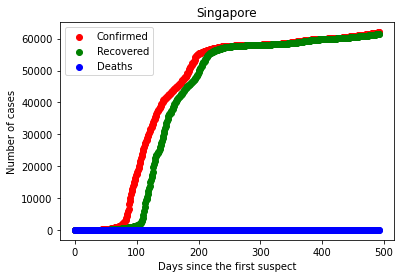

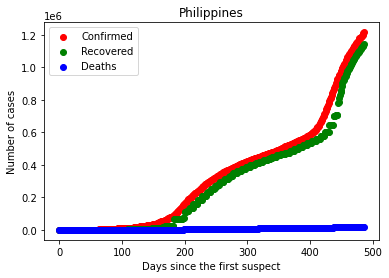

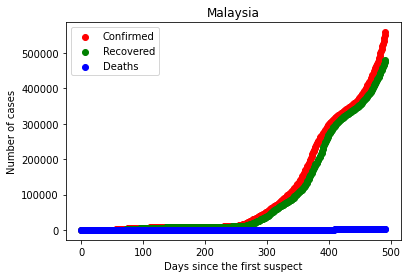

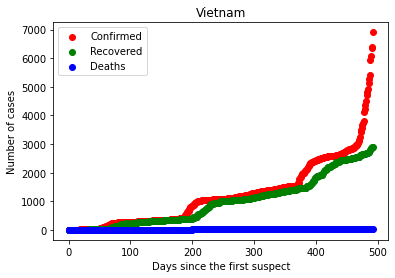

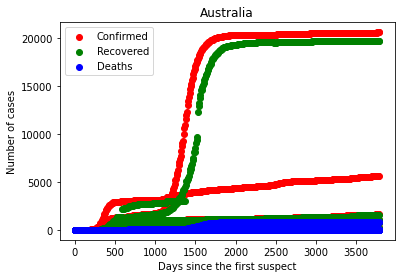

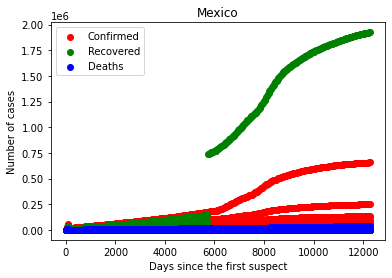

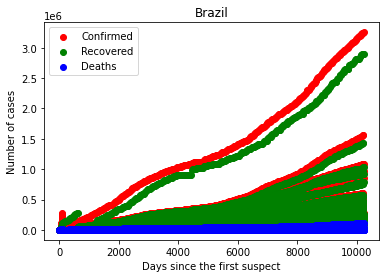

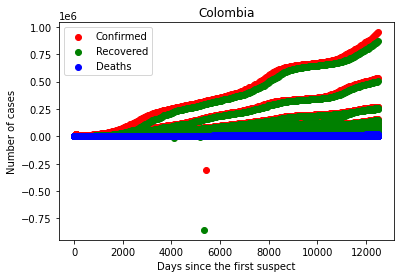

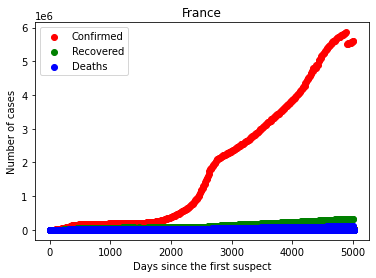

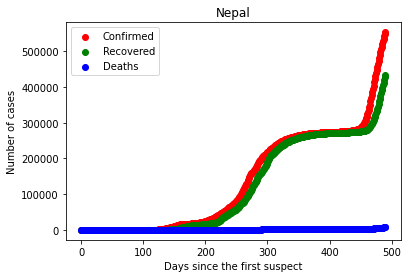

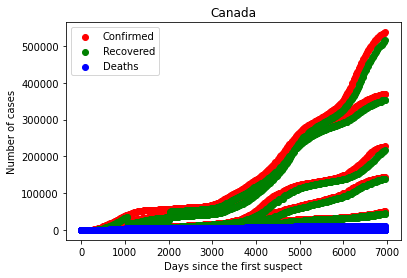

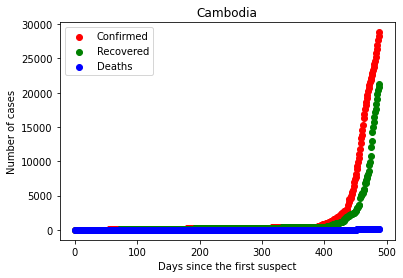

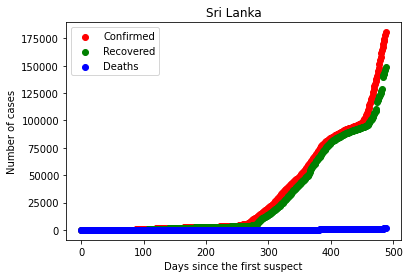

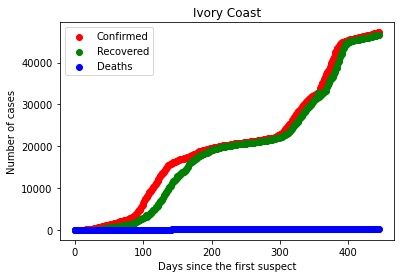

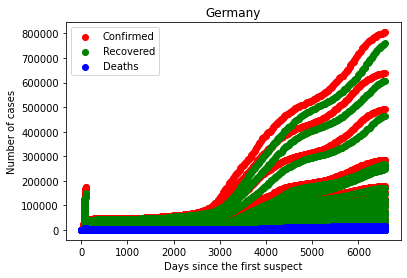

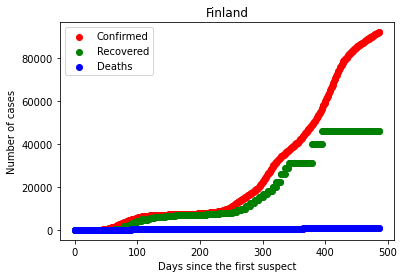

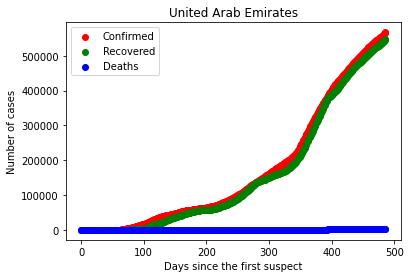

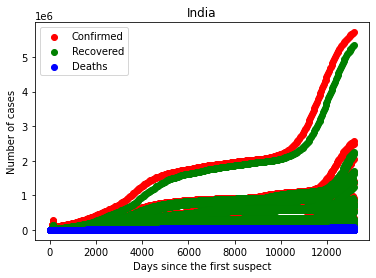

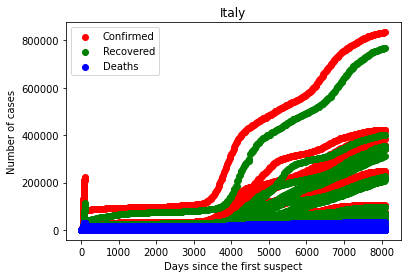

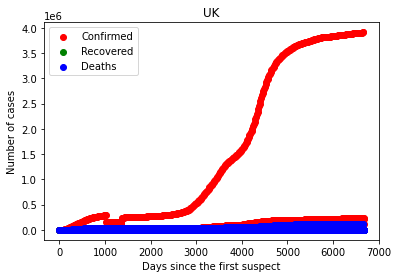

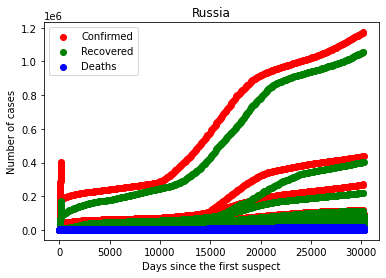

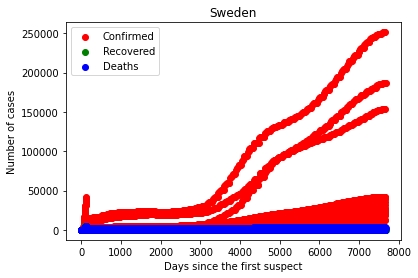

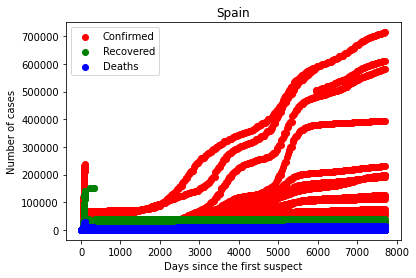

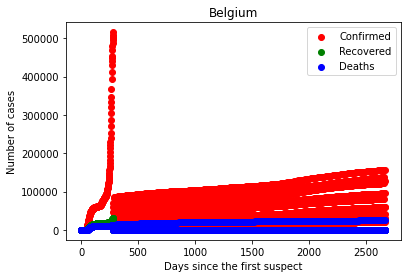

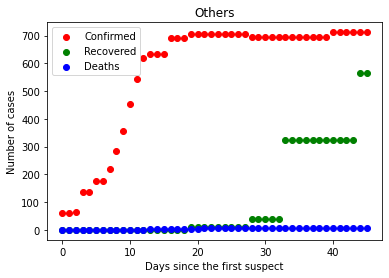

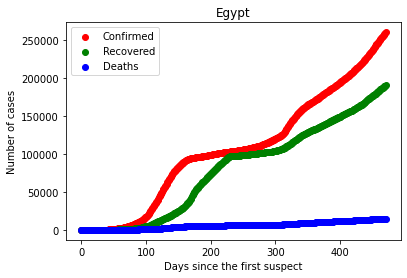

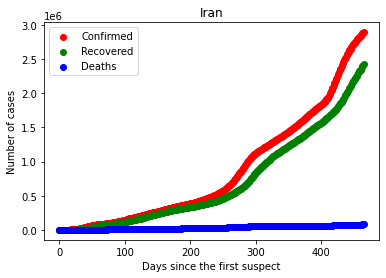

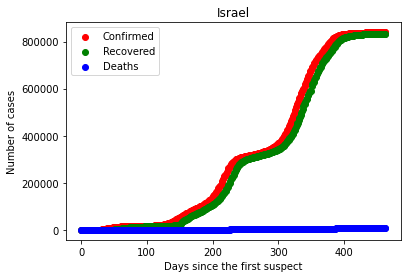

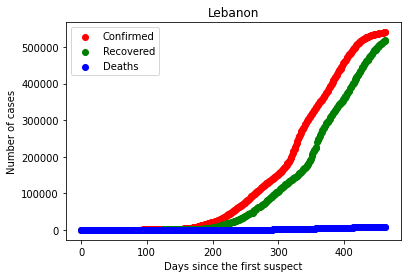

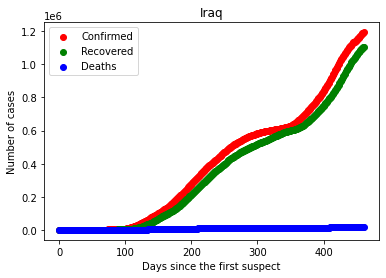

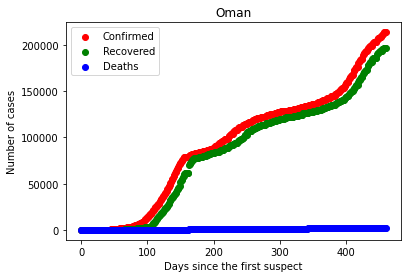

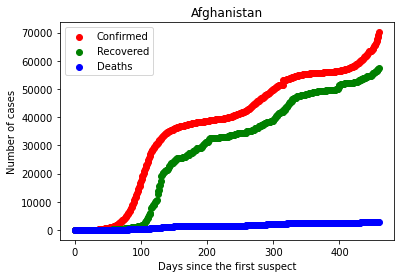

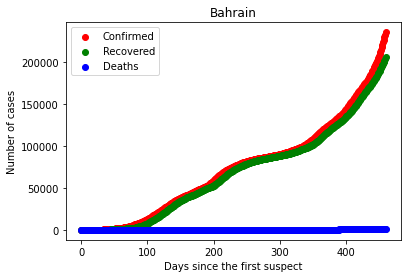

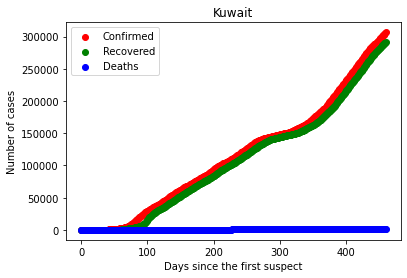

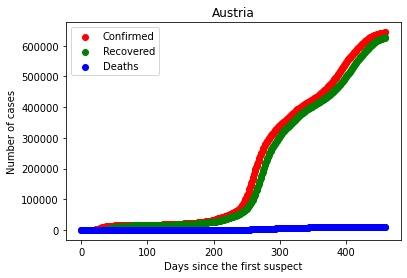

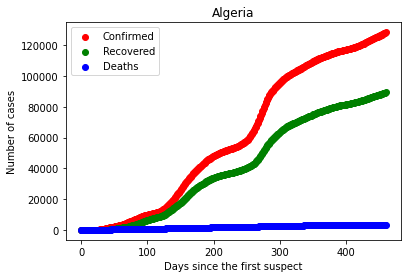

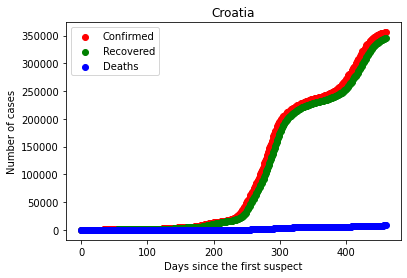

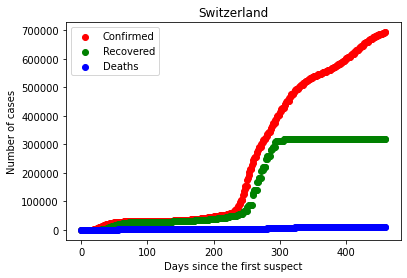

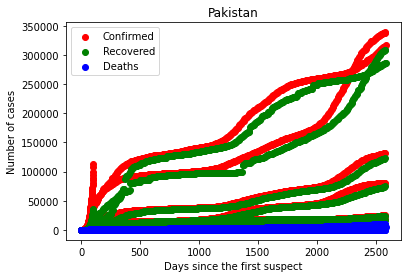

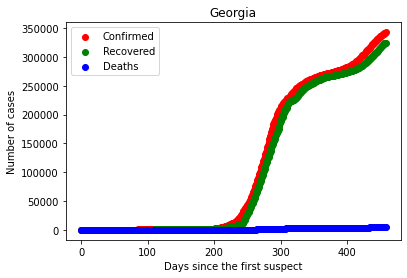

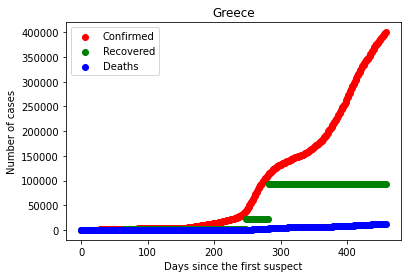

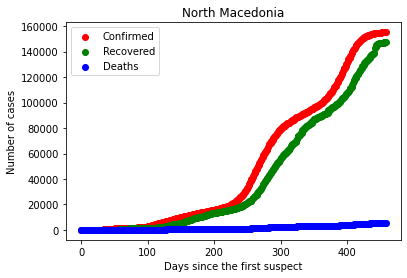

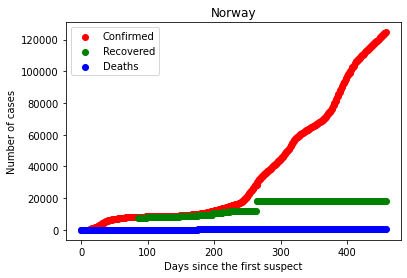

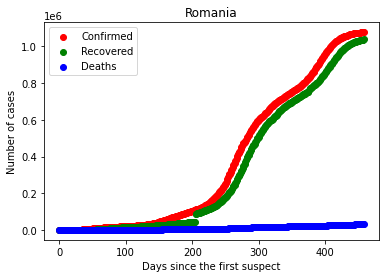

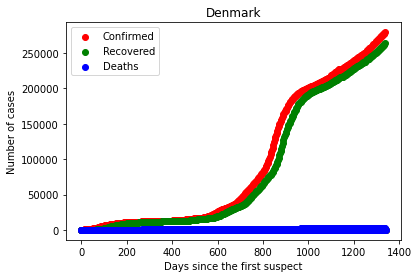

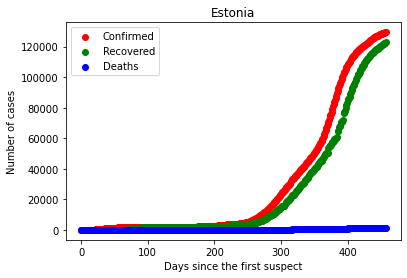

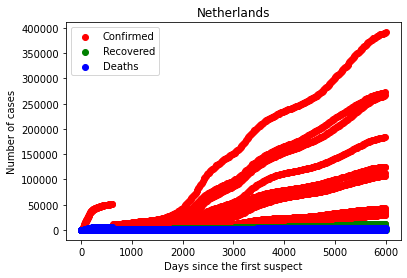

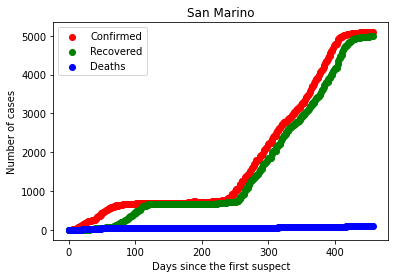

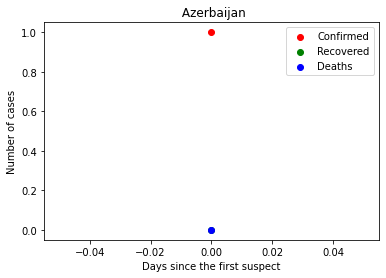

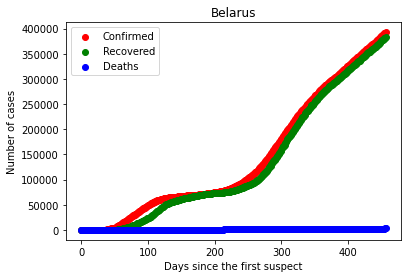

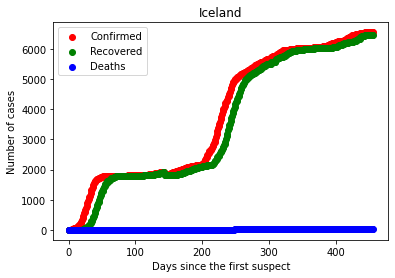

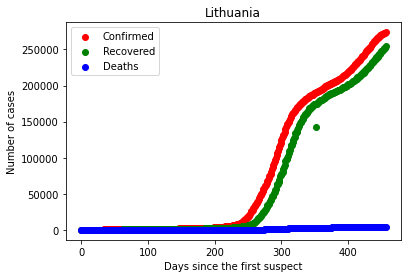

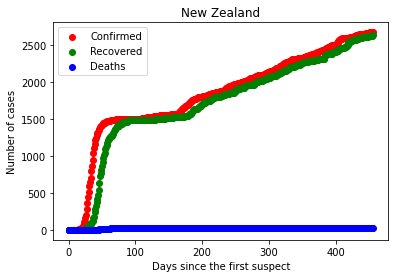

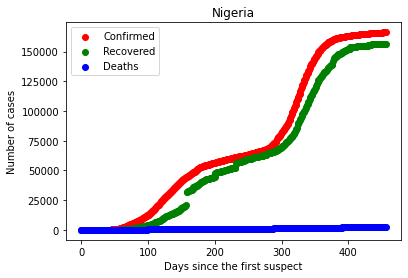

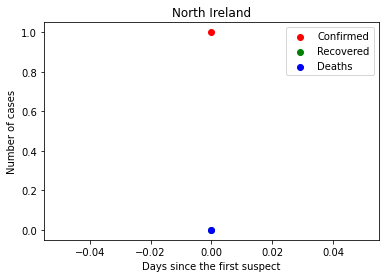

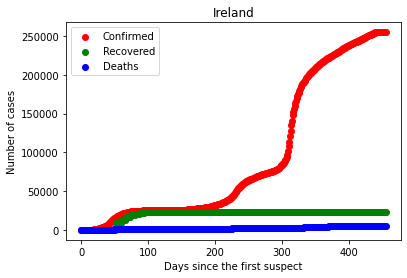

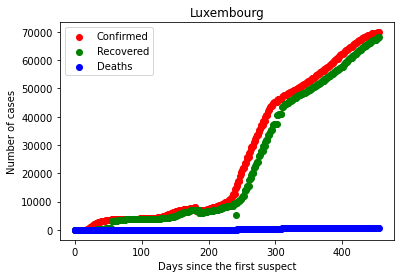

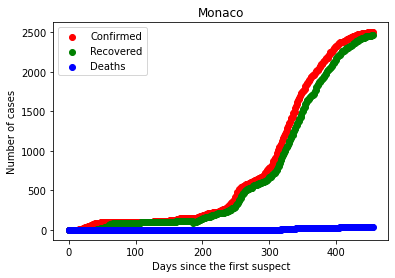

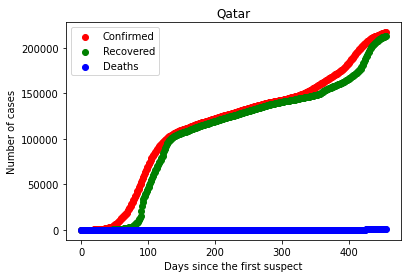

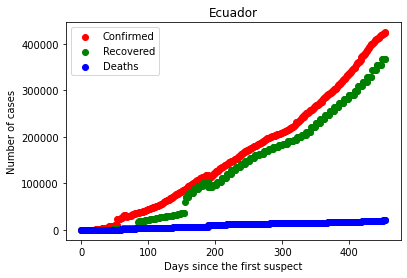

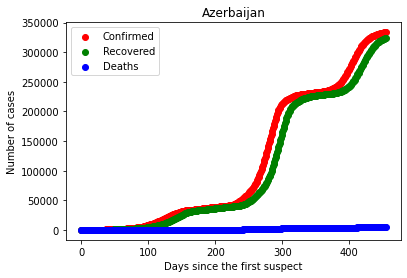

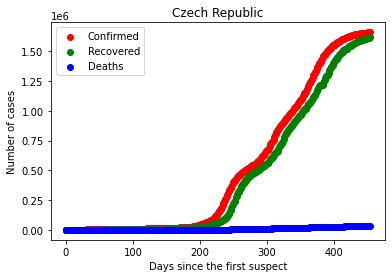

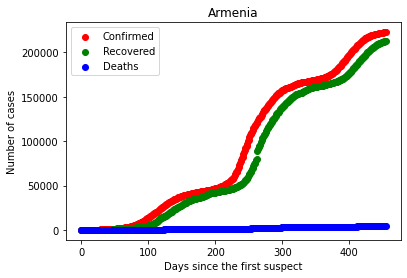

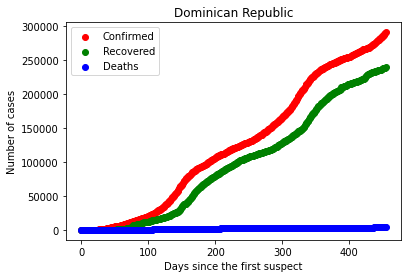

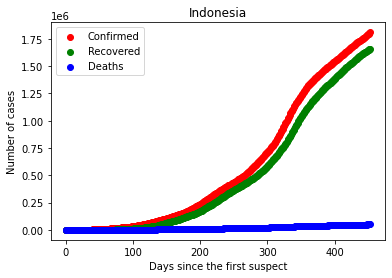

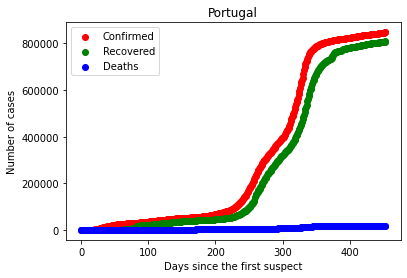

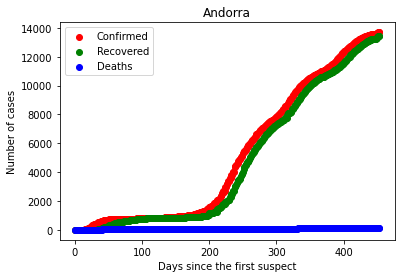

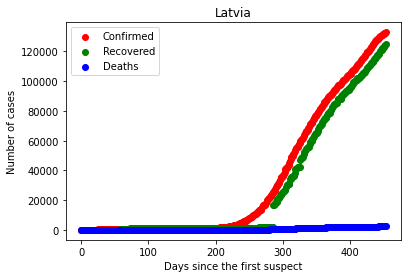

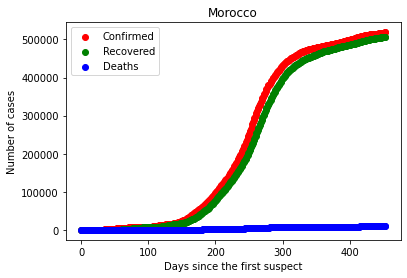

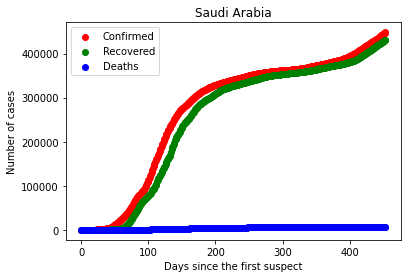

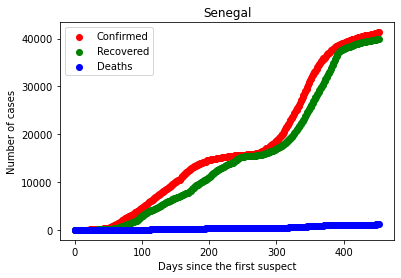

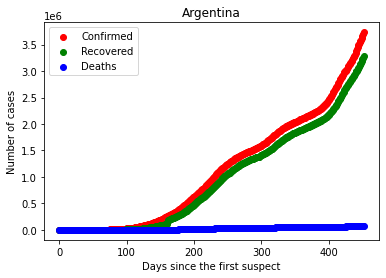

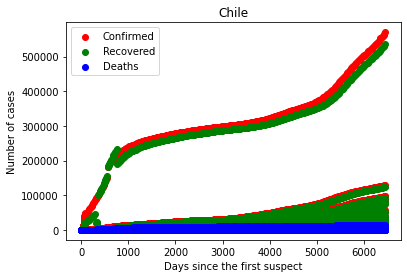

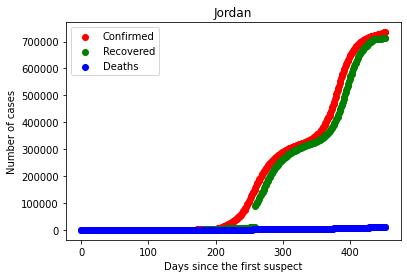

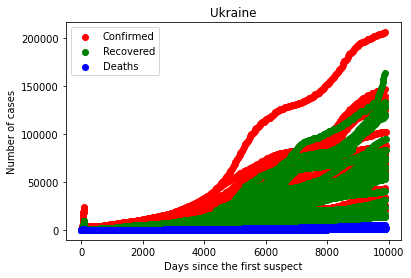

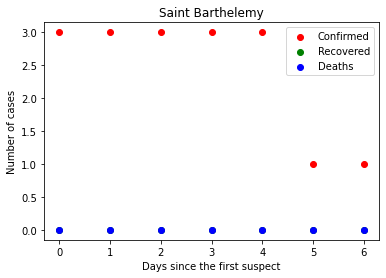

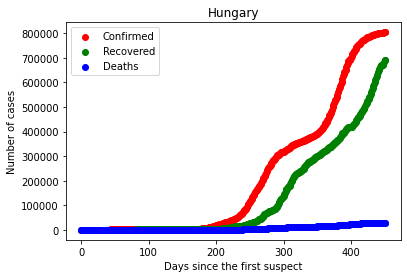

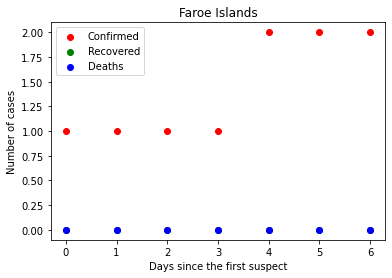

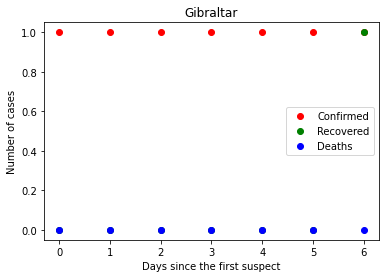

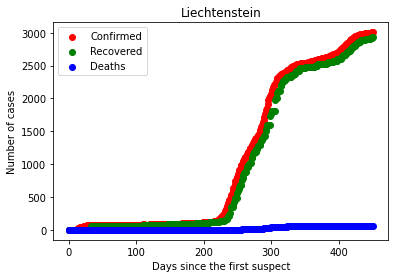

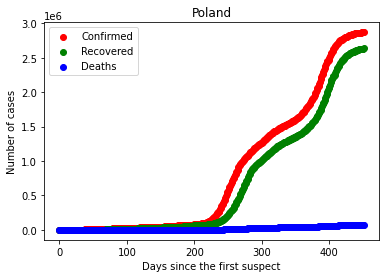

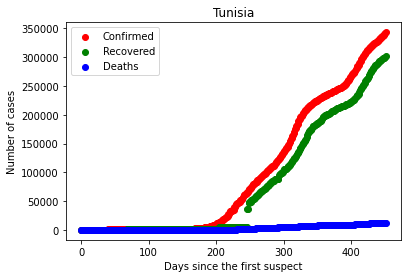

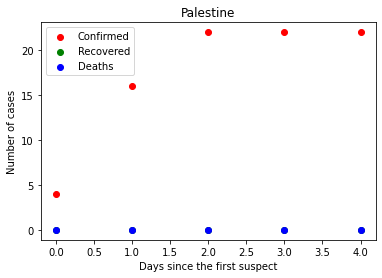

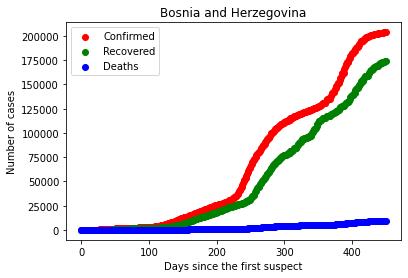

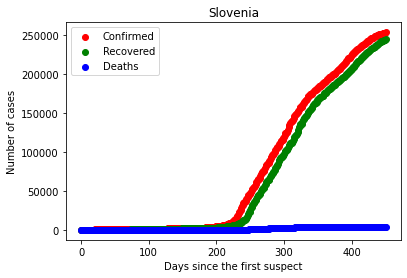

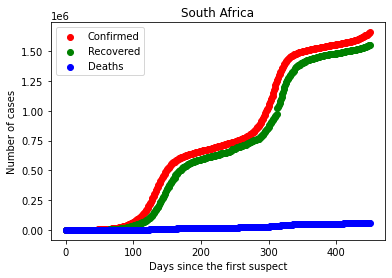

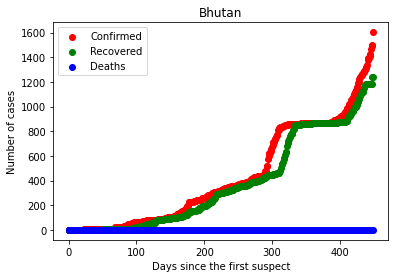

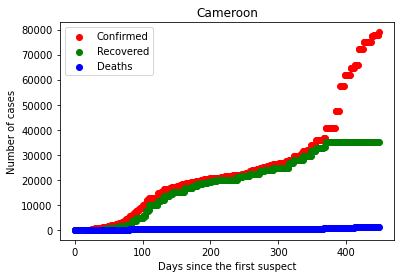

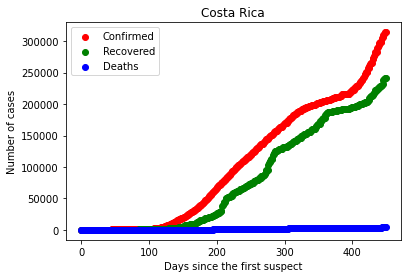

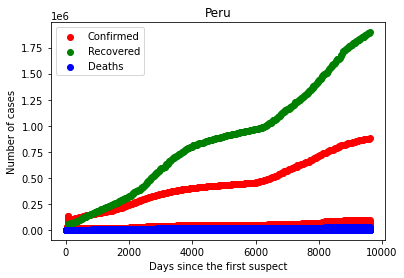

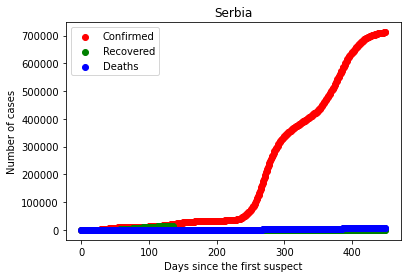

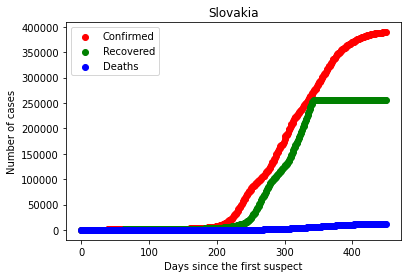

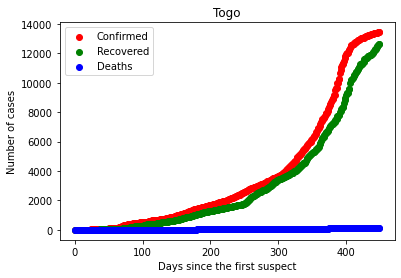

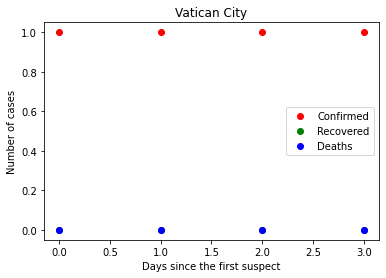

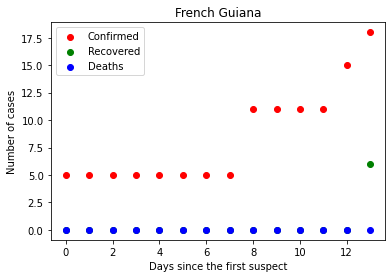

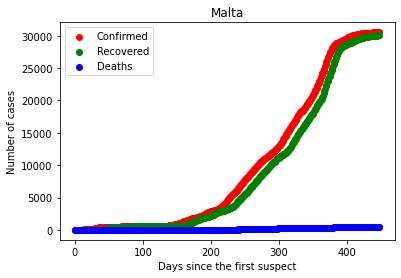

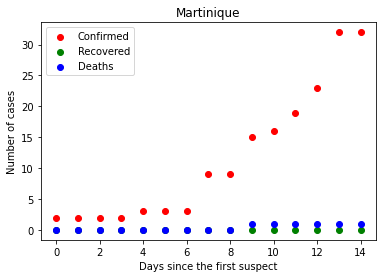

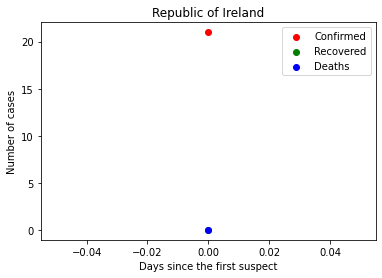

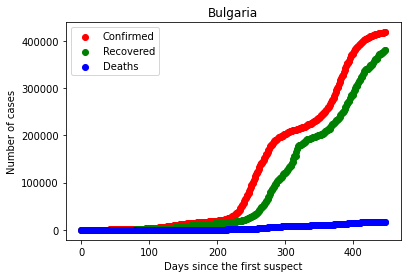

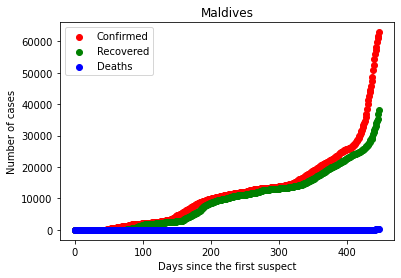

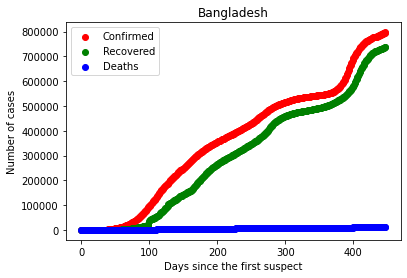

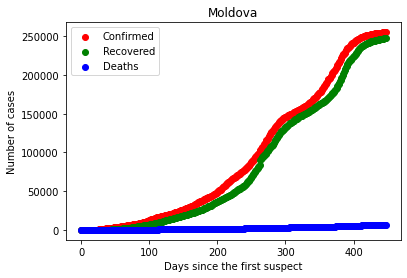

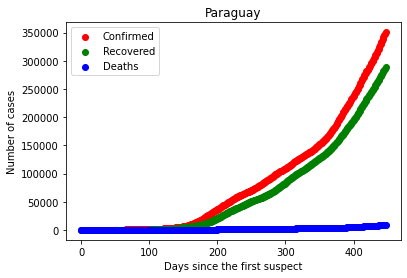

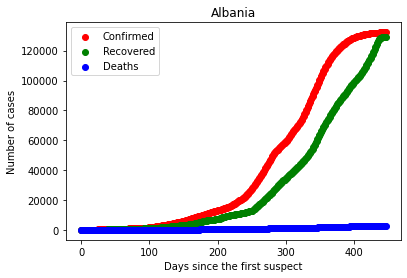

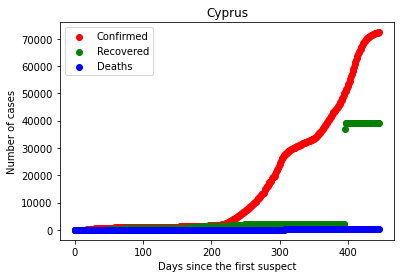

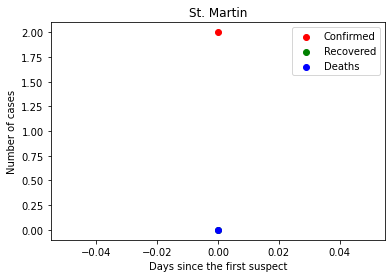

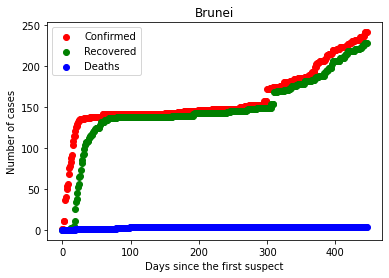

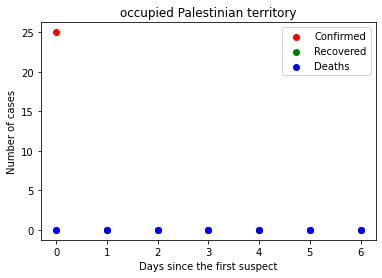

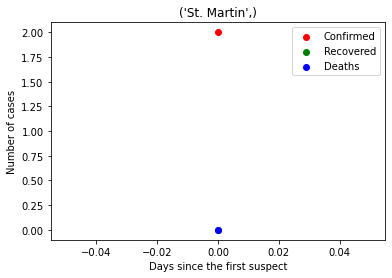

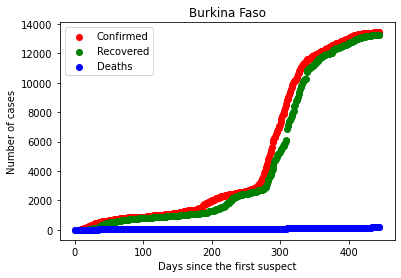

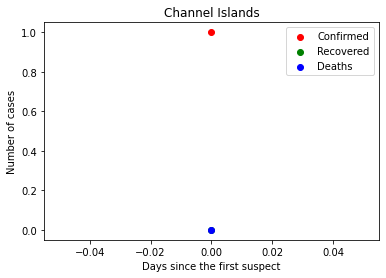

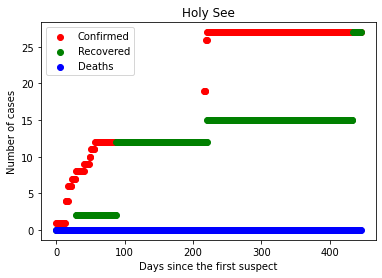

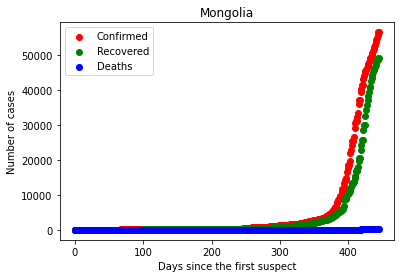

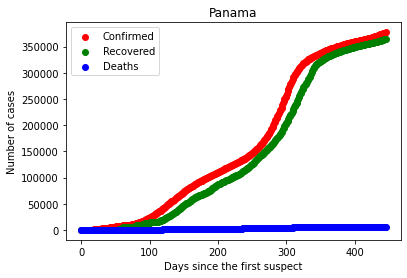

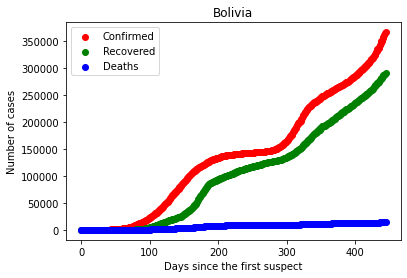

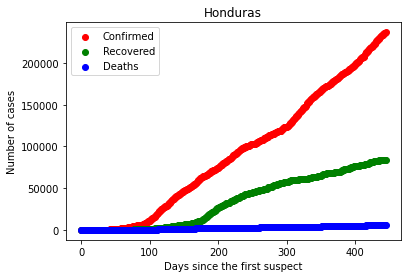

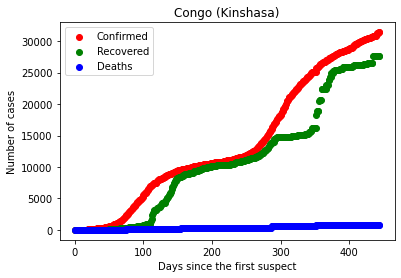

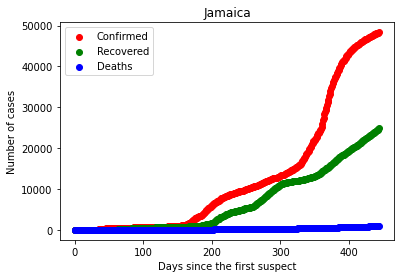

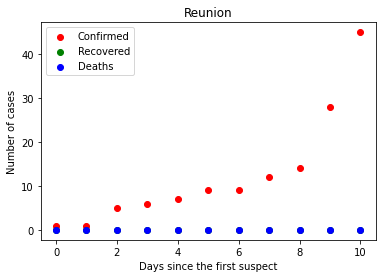

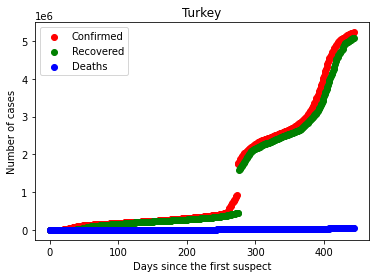

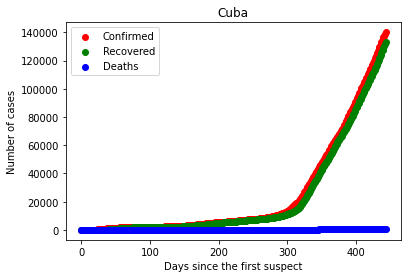

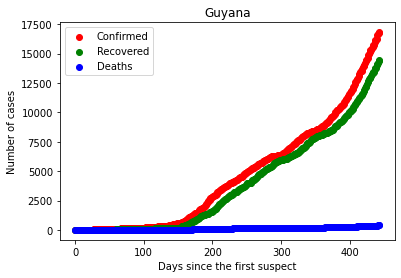

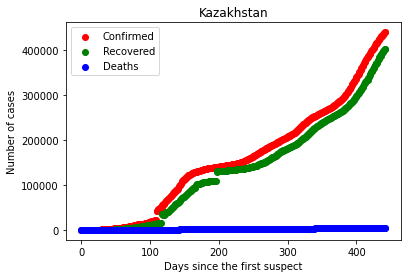

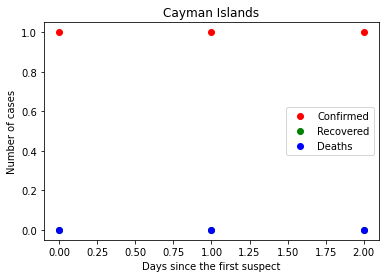

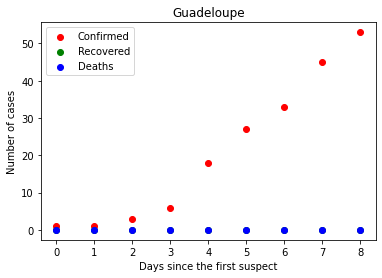

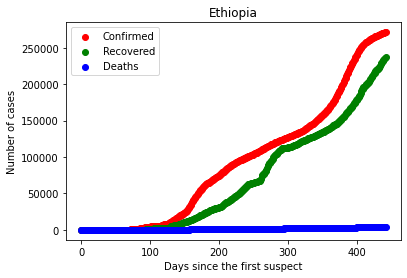

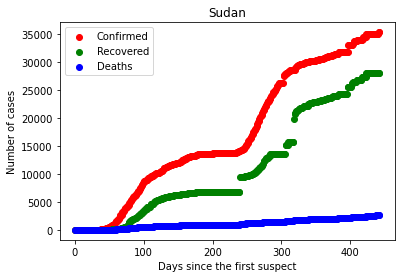

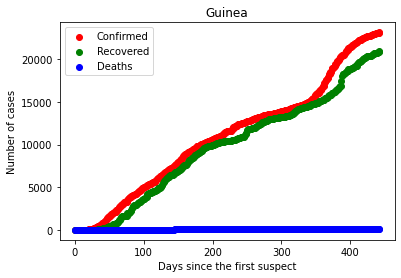

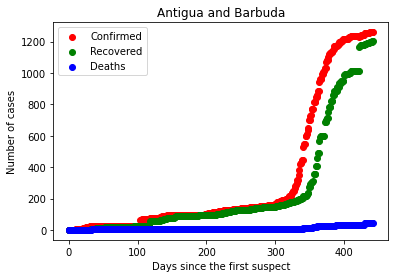

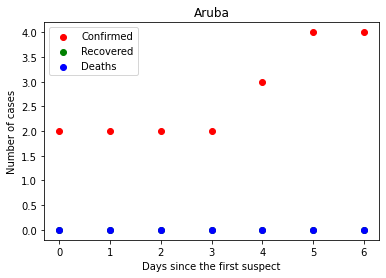

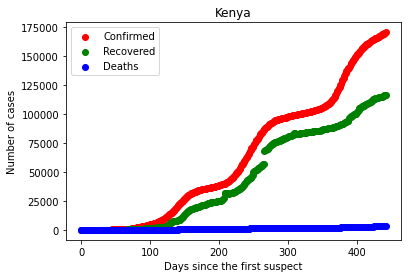

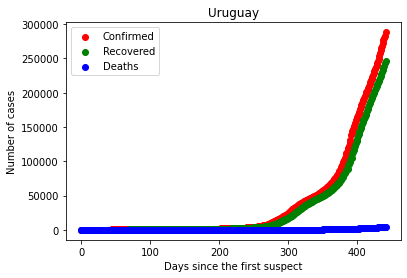

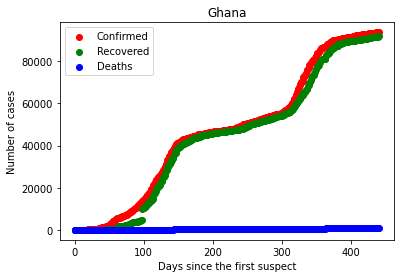

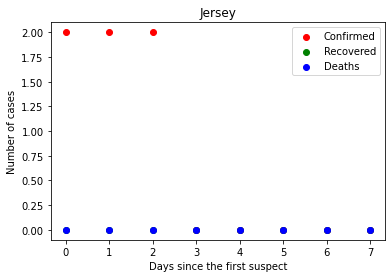

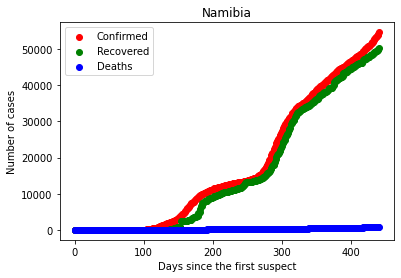

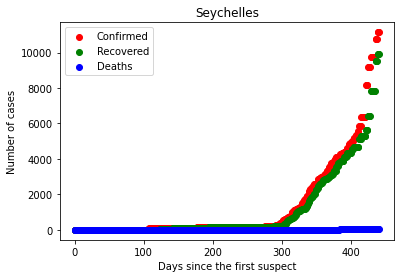

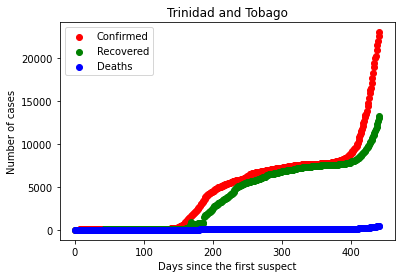

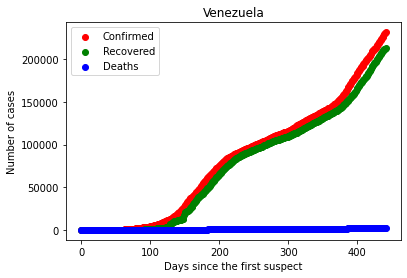

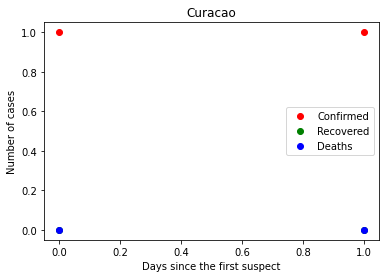

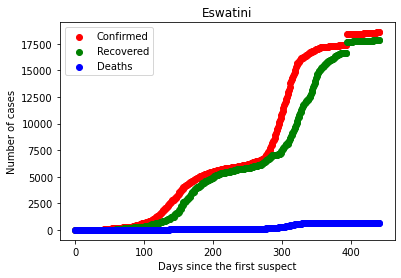

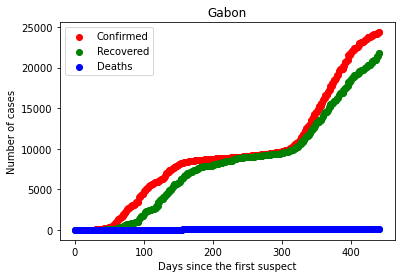

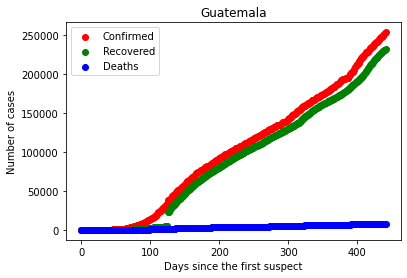

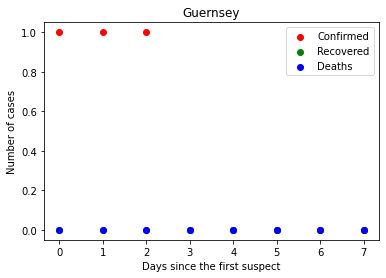

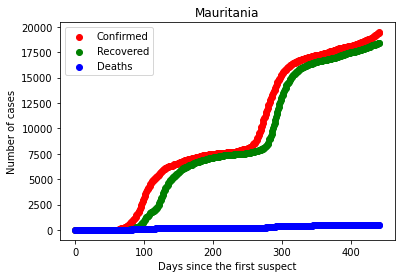

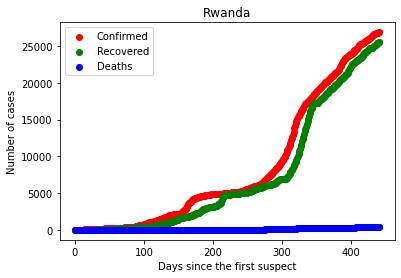

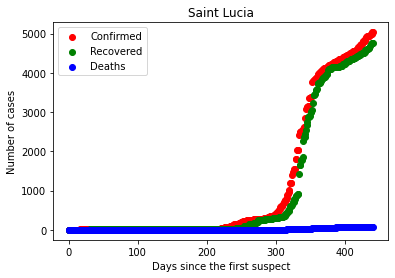

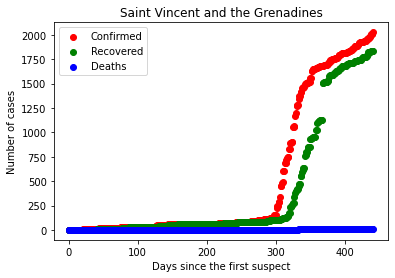

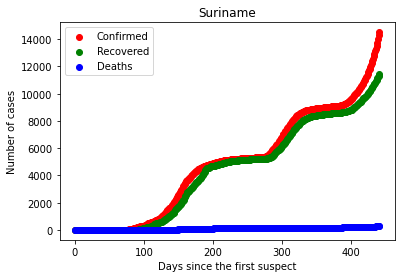

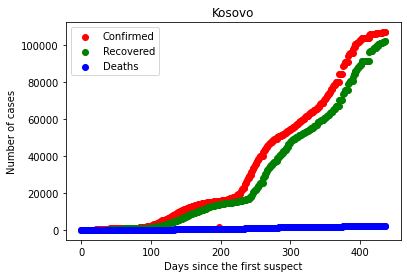

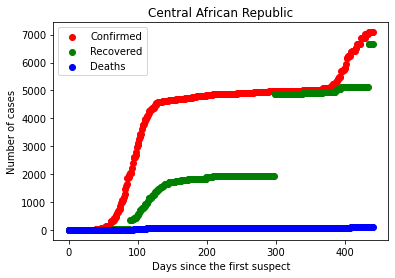

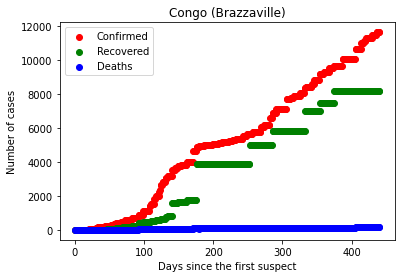

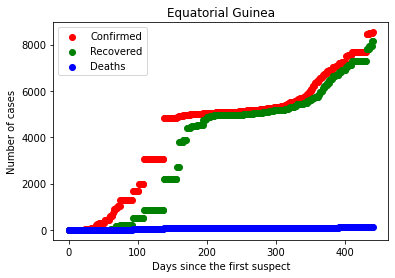

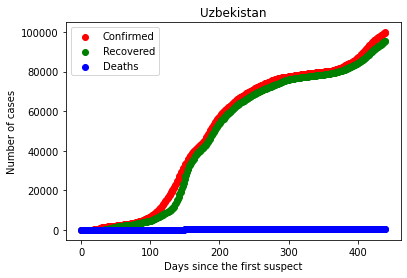

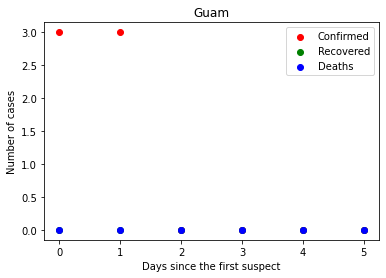

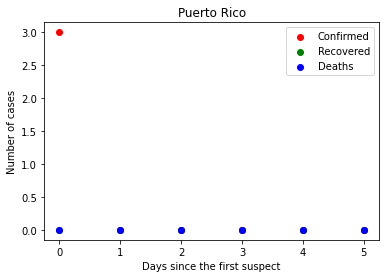

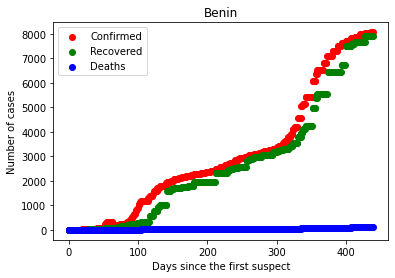

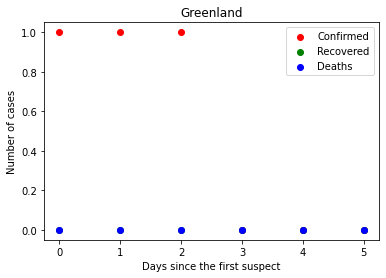

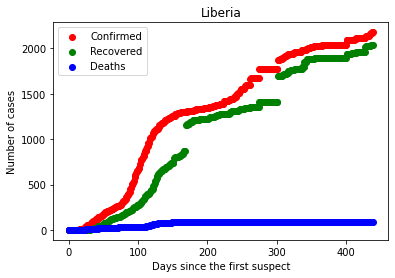

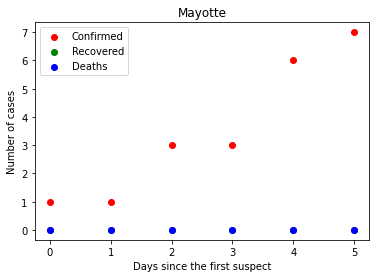

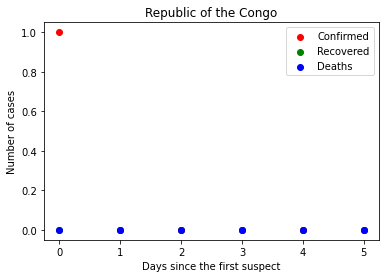

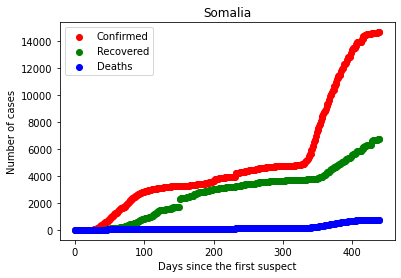

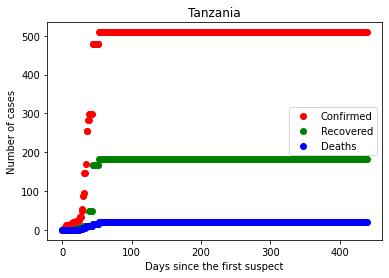

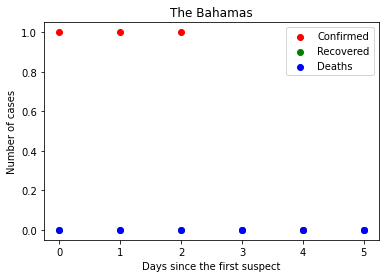

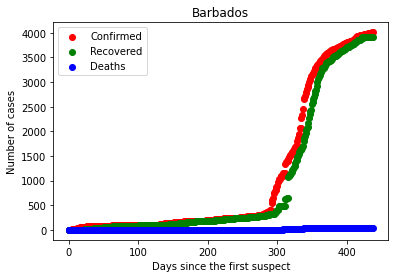

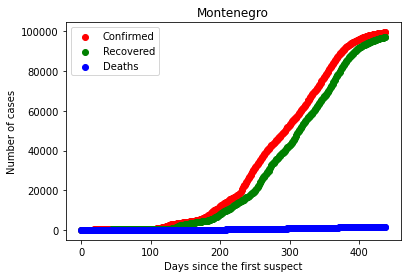

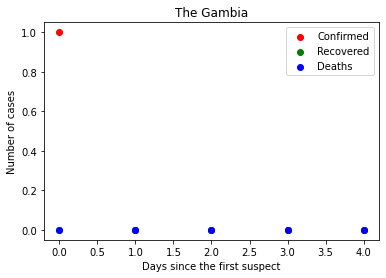

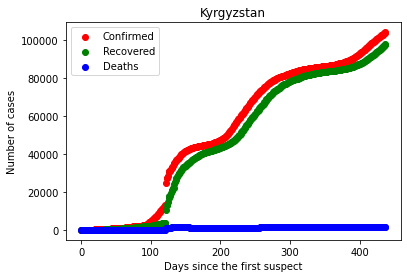

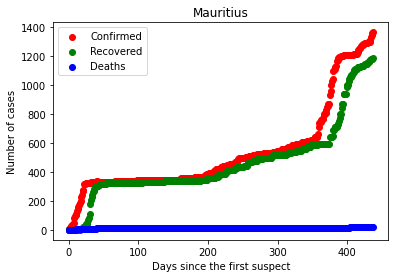

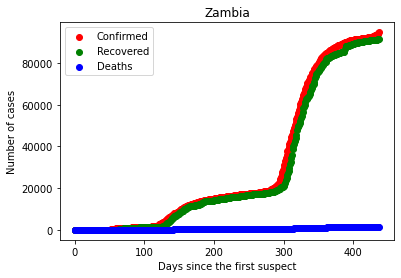

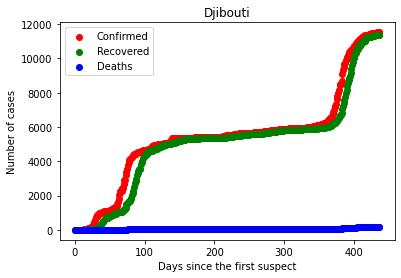

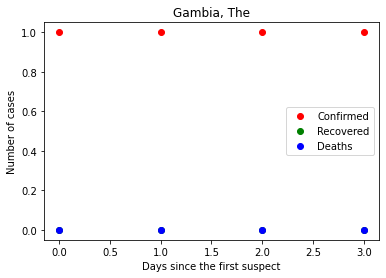

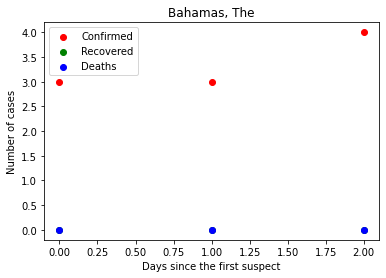

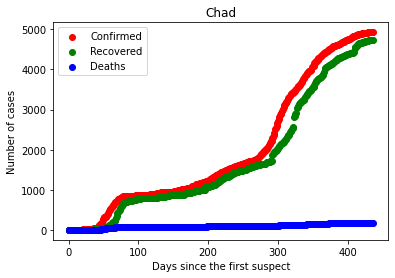

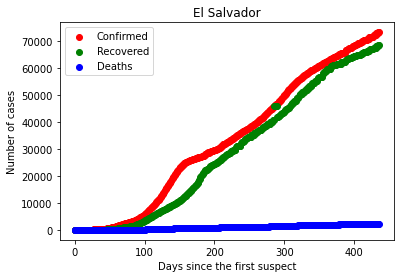

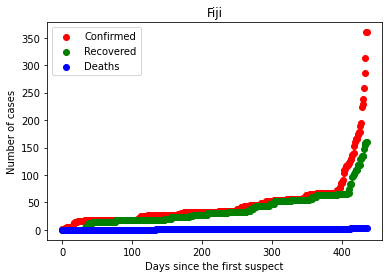

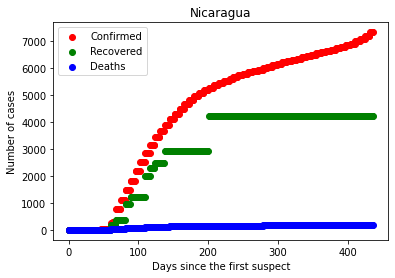

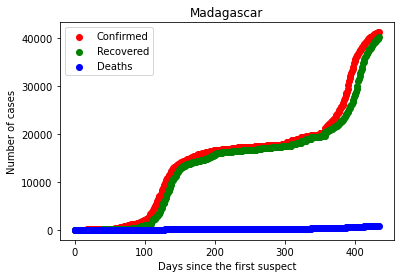

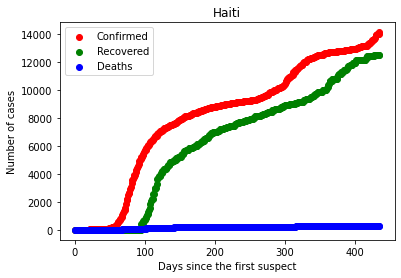

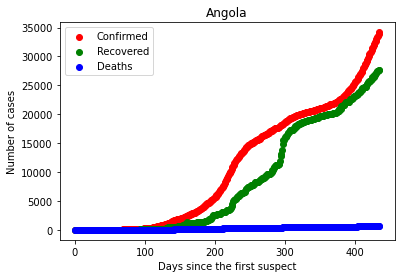

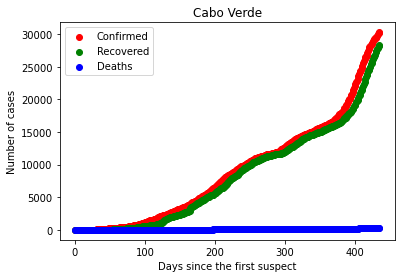

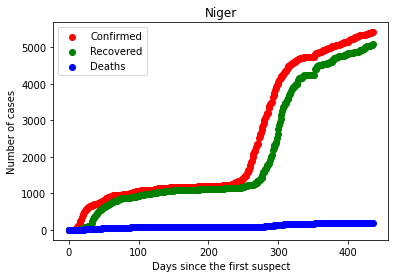

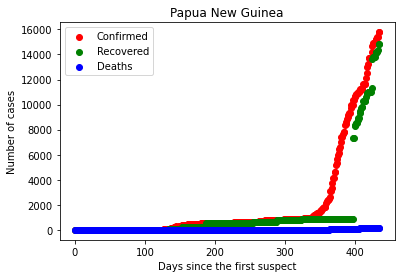

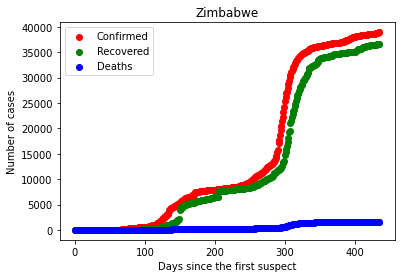

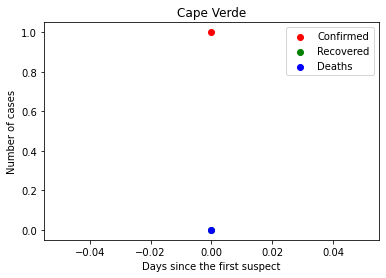

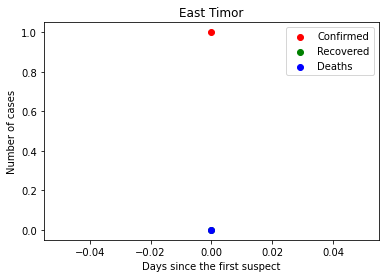

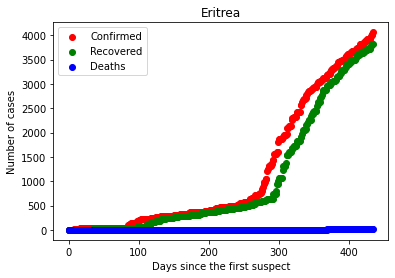

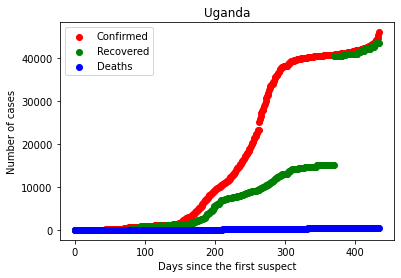

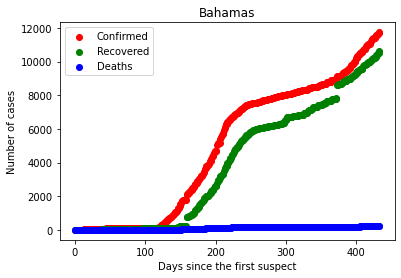

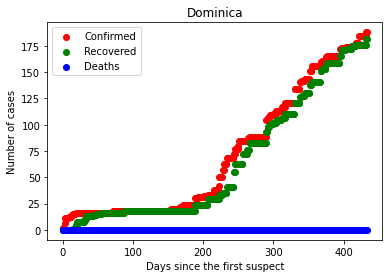

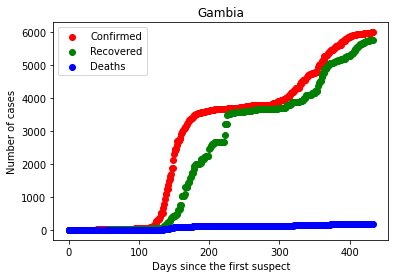

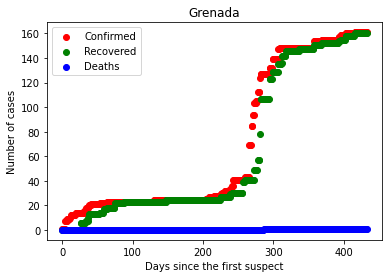

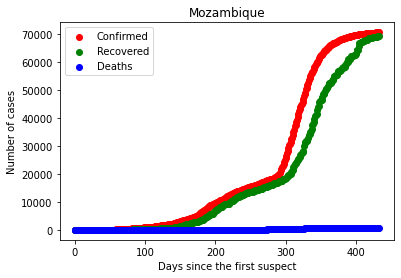

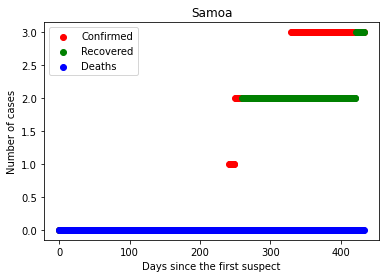

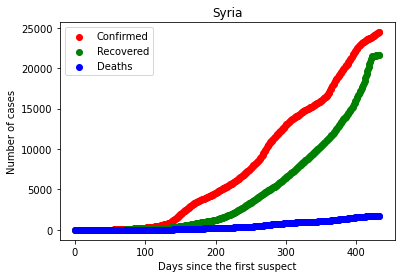

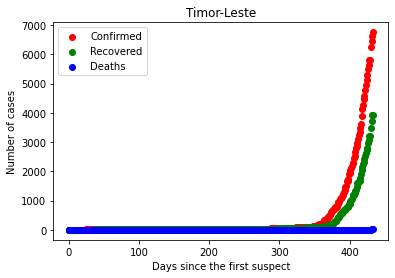

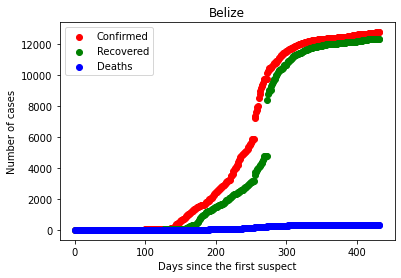

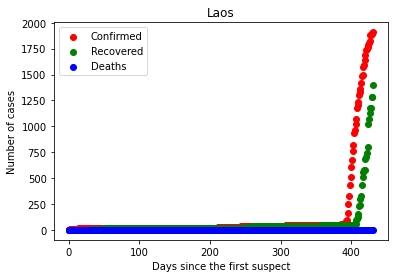

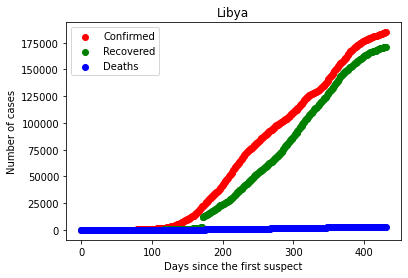

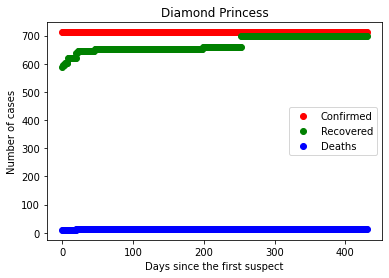

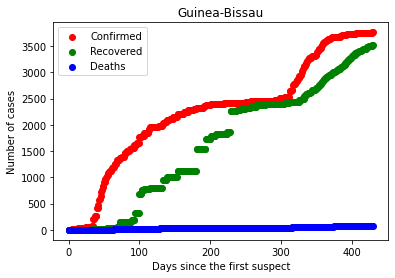

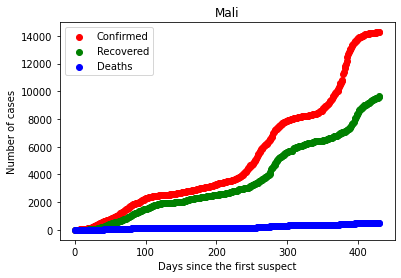

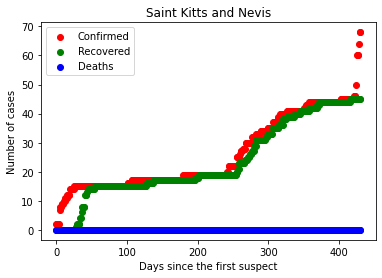

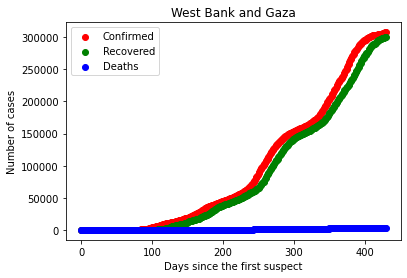

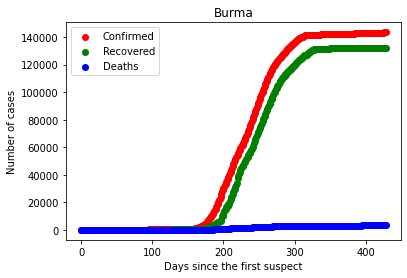

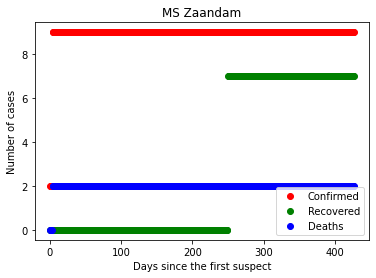

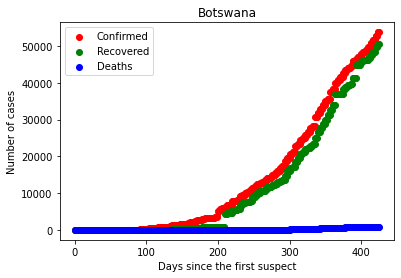

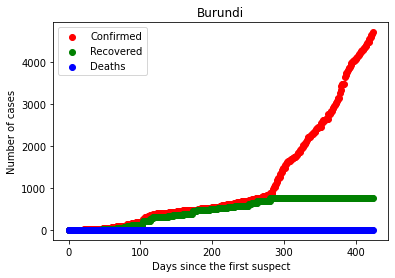

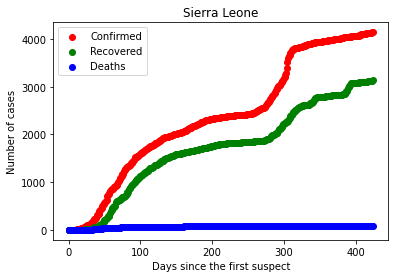

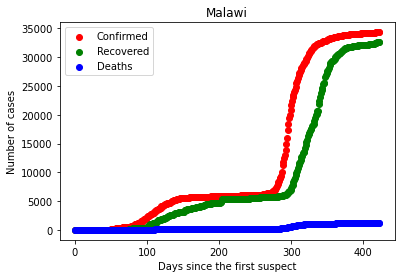

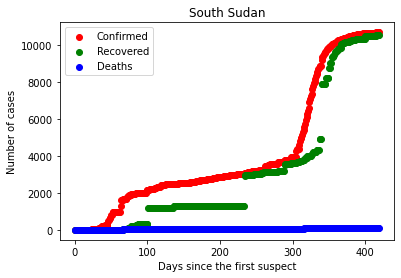

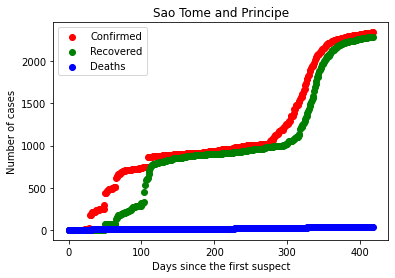

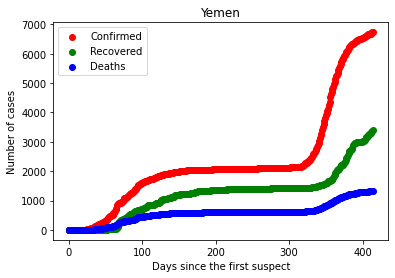

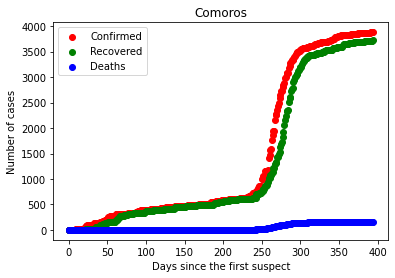

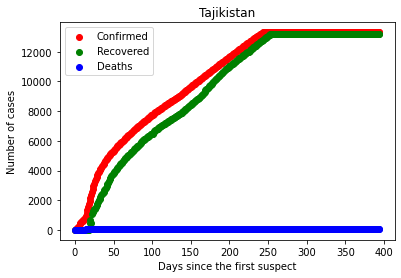

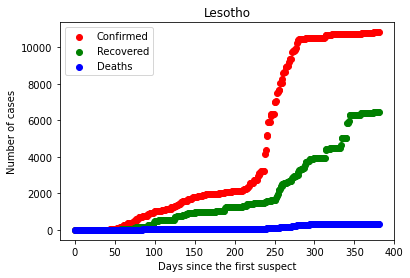

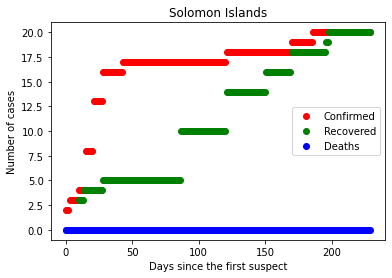

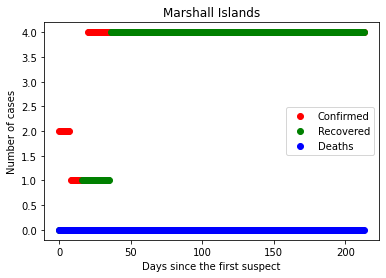

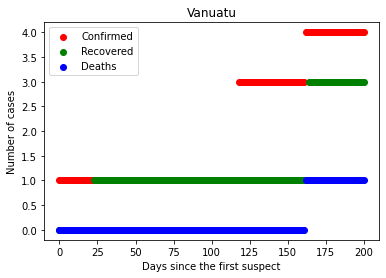

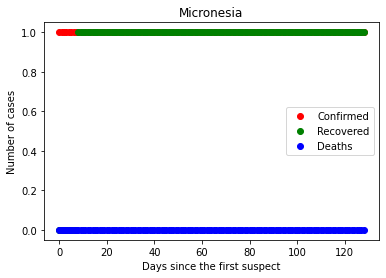

In [60]:
for idx in range(0,len(countries)):    
    C = df2[df2['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='red',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='blue',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()    